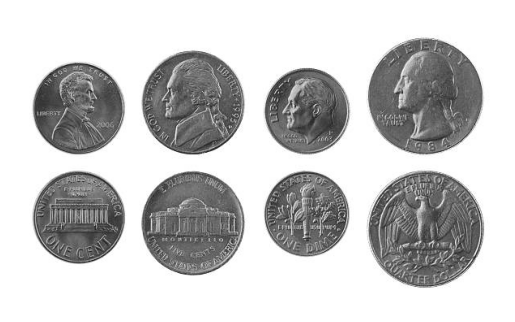

In [14]:
#  negative of image
import cv2
import numpy as np
import matplotlib.pyplot as plt
path = r'C:\Users\Wahaj Sajid\Desktop\coins.jpg'
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)


plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

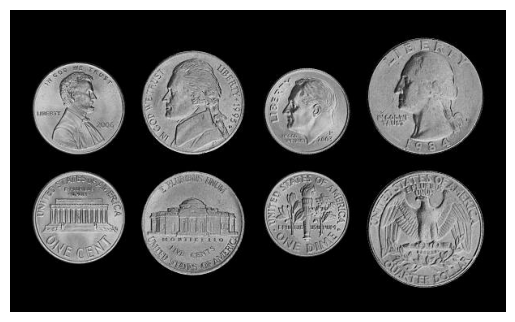

In [15]:
#  negative of image
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
img1 = 255 - img


plt.imshow(img1, cmap='gray')
plt.axis('off')
plt.show()

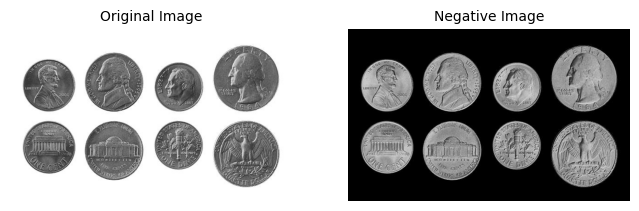

In [16]:
# original image and negative of image
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
img1 = cv2.bitwise_not(img)


fig, axs = plt.subplots(1,2,figsize=(8,8))
# fig.suptitle('Brightness changes')
axs[0].imshow(img,cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original Image',fontsize='medium')

axs[1].imshow(img1,cmap='gray')
axs[1].axis('off')
axs[1].set_title('Negative Image',fontsize='medium')
plt.show()

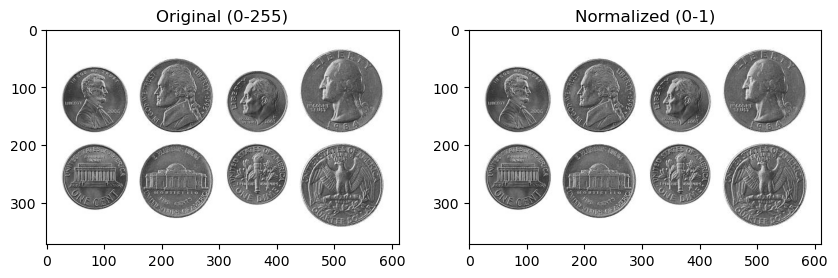

In [17]:
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
# Task 3: Normalize uint8 image between 0 and 1
normalized = img.astype(np.float32) / 255.0

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original (0-255)')
plt.subplot(122), plt.imshow(normalized, cmap='gray'), plt.title('Normalized (0-1)')
plt.show()

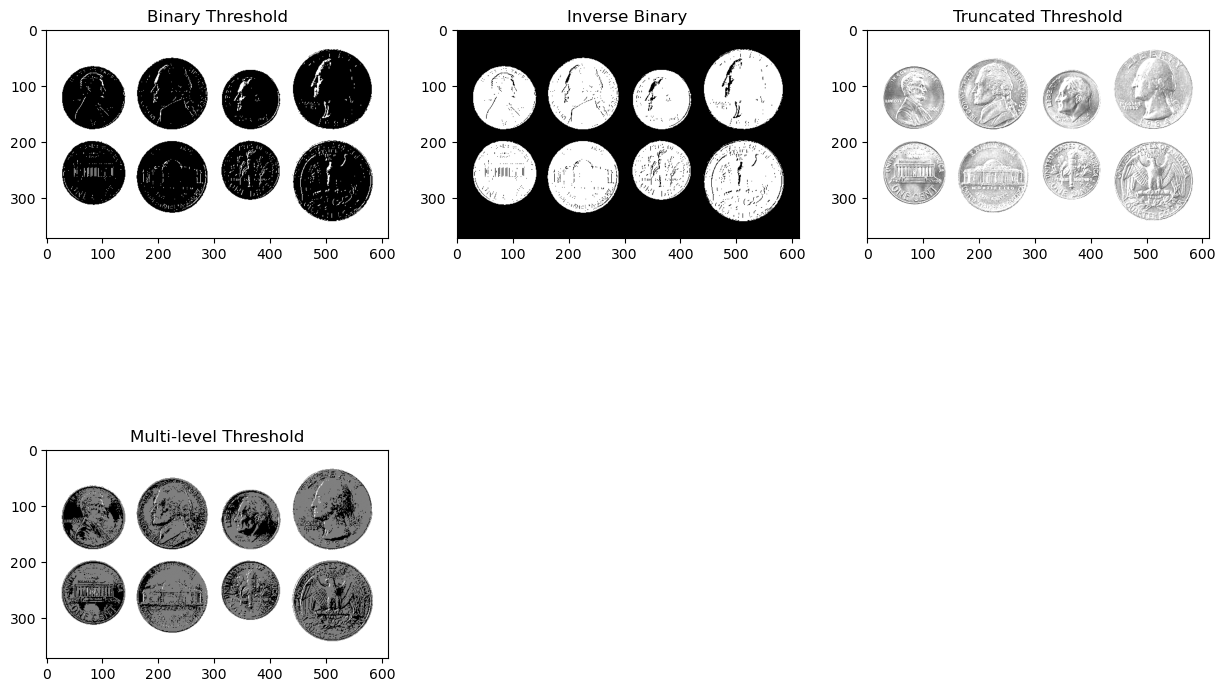

In [18]:
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
# Task 4: Multi-threshold segmentation
# Let's use Otsu's method to find optimal thresholds
_, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
_, th3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)

# Multi-level thresholding (3 levels)
ret, multi_thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
lower_thresh = ret // 2
upper_thresh = ret + (255 - ret) // 2

multi_level = np.zeros_like(img)
multi_level[img < lower_thresh] = 0
multi_level[(img >= lower_thresh) & (img < upper_thresh)] = 127
multi_level[img >= upper_thresh] = 255

plt.figure(figsize=(15, 10))
plt.subplot(231), plt.imshow(th1, cmap='gray'), plt.title('Binary Threshold')
plt.subplot(232), plt.imshow(th2, cmap='gray'), plt.title('Inverse Binary')
plt.subplot(233), plt.imshow(th3, cmap='gray'), plt.title('Truncated Threshold')
plt.subplot(234), plt.imshow(multi_level, cmap='gray'), plt.title('Multi-level Threshold')
plt.show()

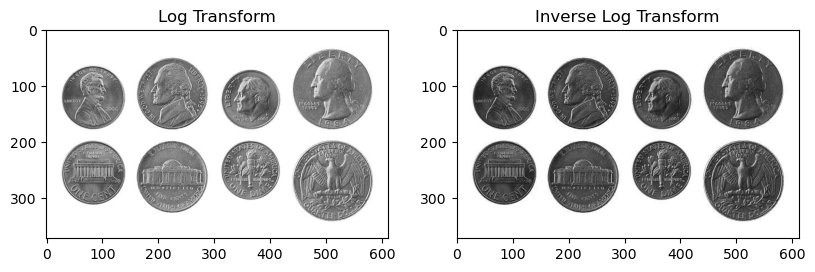

In [19]:
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
# Task 5: Log and inverse log transforms
# First, normalize image to 0-1 range
img_norm = img.astype(np.float32) / 255.0

# Log transform (enhances dark regions)
c = 10  # Scaling constant
log_transformed = c * np.log(1.1 + img_norm)

# Inverse log transform (enhances bright regions)
inv_log_transformed = np.exp(img_norm) / np.exp(1)

plt.figure(figsize=(15, 5))
plt.subplot(132), plt.imshow(log_transformed, cmap='gray'), plt.title('Log Transform')
plt.subplot(133), plt.imshow(inv_log_transformed, cmap='gray'), plt.title('Inverse Log Transform')
plt.show()

## **Spatial Correlation**
1. Measures similarity between an image and a kernel/filter 
2. No kernel flipping is performed before application 
3. Used in template matching, edge detection, and feature extraction

## Formula:
C(x,y) = ∑∑ I(x+i,y+j) * K(i,j)

## **Spatial Convolution**
1. Mathematical operation combining an image with a flipped kernel
2. Kernel is rotated 180° before application
3. Fundamental to linear filtering (blurring, sharpening)

## Formula:

C(x,y) = ∑∑ I(x-i,y-j) * K(i,j)

In [20]:
import cv2
import numpy as np

img = cv2.imread(r'C:\Users\Wahaj Sajid\Desktop\coins.jpg', 0)  # Read as grayscale
kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

# True convolution requires kernel rotation
rotated_kernel = np.rot90(kernel, 2)  # 180° rotation

# Correlation (default behavior)
correlation = cv2.filter2D(img, -1, kernel)

# Convolution (manual rotation)
convolution = cv2.filter2D(img, -1, rotated_kernel)

# Using SciPy for exact convolution
from scipy import signal
convolution_scipy = signal.convolve2d(img, kernel, mode='same')

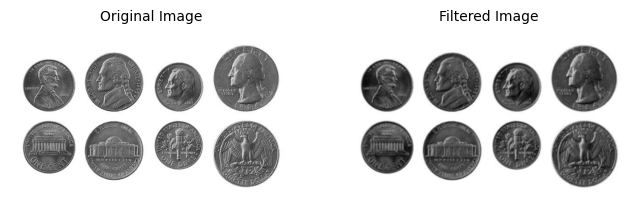

In [21]:
# In OpenCV explore how the 2D convolution is performed (Filter2D function).

import cv2
import numpy as np

img = cv2.imread(r'C:\Users\Wahaj Sajid\Desktop\coins.jpg', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((3,3), np.float32)/9  # 3x3 averaging filter
result = cv2.filter2D(img, -1, kernel)


fig, axs = plt.subplots(1,2,figsize=(8,8))
# fig.suptitle('Brightness changes')
axs[0].imshow(img,cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original Image',fontsize='medium')

axs[1].imshow(result,cmap='gray')
axs[1].axis('off')
axs[1].set_title('Filtered Image',fontsize='medium')
plt.show()

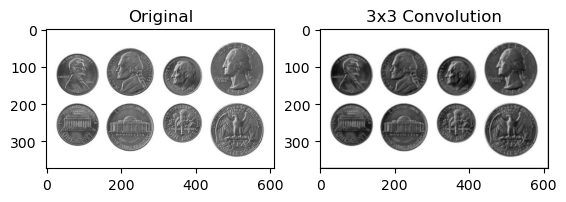

In [22]:
# Perform convolution with the following kernel and display the output.
# 3x3 kernel
import cv2
import numpy as np

img = cv2.imread(r'C:\Users\Wahaj Sajid\Desktop\coins.jpg', cv2.IMREAD_GRAYSCALE)
# Define the 3x3 kernel
# kernel_3x3 = np.array([[1, 1,1],
#                        [1, 1,1]], dtype=np.float32)
kernel = np.ones((3,3), np.float32)/9 
# Perform convolution
conv_result = cv2.filter2D(img, -1, kernel, borderType=cv2.BORDER_CONSTANT)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(132), plt.imshow(conv_result, cmap='gray'), plt.title('3x3 Convolution')
plt.show()

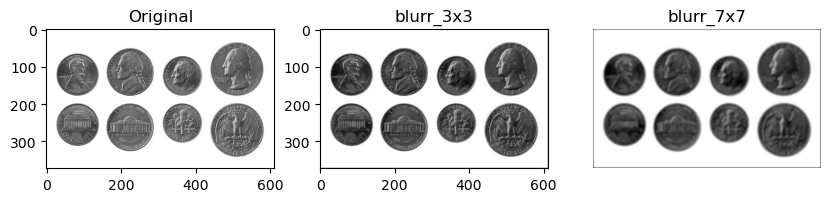

In [23]:
# If you increase the size of kernel to 7x7 and divide by 1/49, what will be the impact?

import cv2
import numpy as np

img = cv2.imread(r'C:\Users\Wahaj Sajid\Desktop\coins.jpg', cv2.IMREAD_GRAYSCALE)
# Define the 3x3 kernel
# kernel_3x3 = np.array([[1, 1,1],
#                        [1, 1,1]], dtype=np.float32)
kernel = np.ones((3,3), np.float32)/9 
kernel1 = np.ones((7,7), np.float32)/49 

# Perform convolution
blurr_3x3 = cv2.filter2D(img, -1, kernel, borderType=cv2.BORDER_CONSTANT)
blurr_7x7 = cv2.filter2D(img, -1, kernel1, borderType=cv2.BORDER_CONSTANT)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(132), plt.imshow(blurr_3x3, cmap='gray'), plt.title('blurr_3x3')
plt.subplot(133), plt.imshow(blurr_7x7, cmap='gray'), plt.title('blurr_7x7')
plt.axis('off')
plt.show()

Symmetric kernel results identical? True


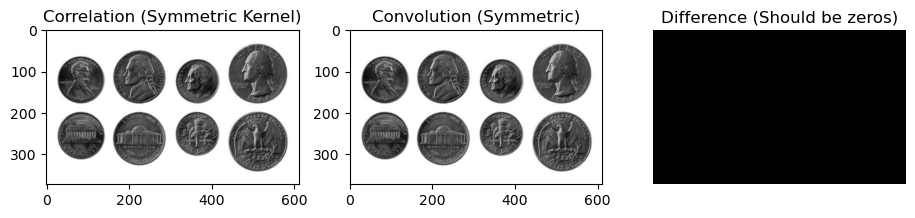

In [24]:
# Perform correlation with the same kernel and see if the output images of convolution and correlation are same or different.
# 1. Convolution and Correlation with a Symmetric Kernel
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a symmetric kernel (3x3 averaging filter)
kernel_sym = np.array([[1, 2, 1],
                       [2, 4, 2],
                       [1, 2, 1]], dtype=np.float32)/16

# Perform correlation (default behavior)
corr_sym = cv2.filter2D(img, -1, kernel_sym)

# Perform true convolution (flip kernel)
conv_kernel_sym = np.flipud(np.fliplr(kernel_sym))  # Will be identical for symmetric kernel
conv_sym = cv2.filter2D(img, -1, conv_kernel_sym)

# Check if identical
print("Symmetric kernel results identical?", np.array_equal(corr_sym, conv_sym))  # True
plt.figure(figsize=(15, 10))

# Symmetric case
plt.subplot(241), plt.imshow(corr_sym, cmap='gray'), plt.title('Correlation (Symmetric Kernel)')
plt.subplot(242), plt.imshow(conv_sym, cmap='gray'), plt.title('Convolution (Symmetric)')
plt.subplot(243), plt.imshow(cv2.absdiff(corr_sym, conv_sym), cmap='gray')
plt.title('Difference (Should be zeros)')
plt.axis('off')
plt.show()

Asymmetric kernel results identical? False


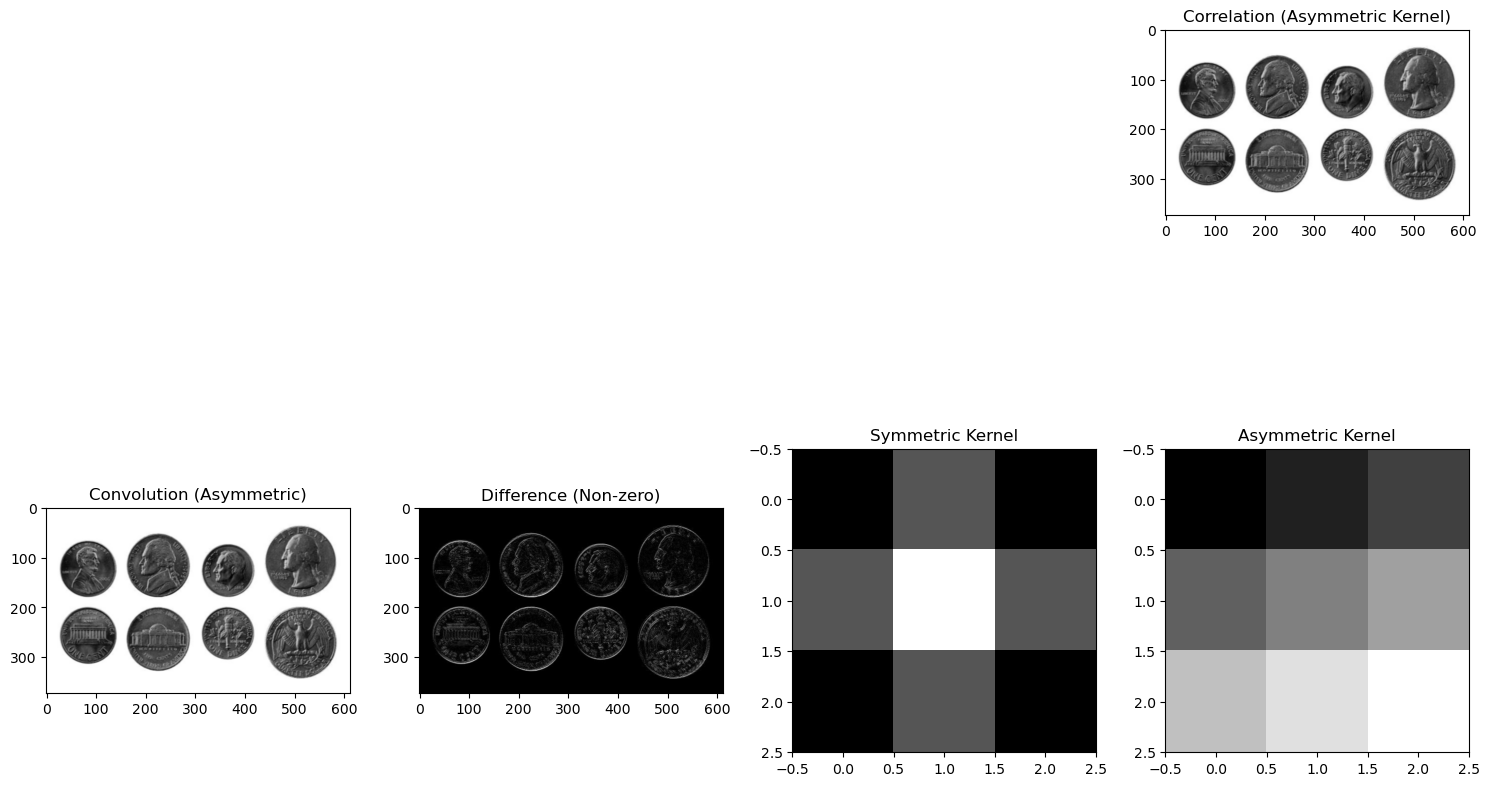

In [25]:
# Create asymmetric kernel
kernel_asym = np.array([[1, 2, 3],
                        [4, 5, 6],
                        [7, 8, 9]], dtype=np.float32)/45

# Correlation
corr_asym = cv2.filter2D(img, -1, kernel_asym)

# True convolution (with flipped kernel)
conv_kernel_asym = np.flipud(np.fliplr(kernel_asym))  # [[9,8,7],[6,5,4],[3,2,1]]/45
conv_asym = cv2.filter2D(img, -1, conv_kernel_asym)

# Check difference
print("Asymmetric kernel results identical?", np.array_equal(corr_asym, conv_asym))  # False
diff_asym = cv2.absdiff(corr_asym, conv_asym)
plt.figure(figsize=(15, 10))
# Asymmetric case
plt.subplot(244), plt.imshow(corr_asym, cmap='gray'), plt.title('Correlation (Asymmetric Kernel)')
plt.subplot(245), plt.imshow(conv_asym, cmap='gray'), plt.title('Convolution (Asymmetric)')
plt.subplot(246), plt.imshow(diff_asym, cmap='gray'), plt.title('Difference (Non-zero)')

# Kernel visualization
plt.subplot(247), plt.imshow(kernel_sym, cmap='gray'), plt.title('Symmetric Kernel')
plt.subplot(248), plt.imshow(kernel_asym, cmap='gray'), plt.title('Asymmetric Kernel')

plt.tight_layout()
plt.show()